In [1]:
%matplotlib inline
import pandas
import numpy as np
df = pandas.read_csv('d.csv', index_col=0)

a = df.iloc[:, :-1]
b = df.iloc[:, 1:]
b.columns = a.columns = range(df.shape[1] - 1)
r = (b - a) / a
p = 1 / np.linalg.norm(r, axis=1)
r = (r.T * p).T.as_matrix()
l = r.shape[0]
cor = np.ones([l, l])
for i in range(l):
    for j in range(i + 1, l):
        s = (r[i] * r[j]).sum()
        cor[i][j] = s
        cor[j][i] = s
        
d = (df.as_matrix().astype(np.float32).T * p).T


In [2]:
d

array([[ 97.57607006,  96.71600907, 101.21055378, ..., 192.23902007,
        197.14972026, 193.45976819],
       [ 84.88817267,  79.14298116,  77.22791733, ...,  89.63675213,
         91.41502623,  84.81001243],
       [ 46.24969006,  45.39392082,  48.20845705, ...,  88.01133332,
         85.99552086,  79.47264039],
       ...,
       [ 63.51648532,  63.03778459,  60.89621225, ..., 133.15534605,
        135.54886893, 140.08395934],
       [148.02075791, 153.88941837, 162.98223317, ..., 302.74338005,
        309.55391882, 307.34411091],
       [ 45.25780007,  45.68361473,  47.54907978, ..., 101.58672696,
         95.66590728,  95.8281176 ]])

In [ ]:
import random
def findDist(n):
    data = []
    for i in range(100000):
        choice = random.sample(range(d.shape[0]), n)
        bad = True
        while bad:
            bad = False
            for k in range(n):
                for l in range(k):
                    if np.abs(cor[k][l]) > 0.75:
                        bad = True
                        break
                if bad:
                    break
            if bad:
                choice = random.sample(range(d.shape[0]), n)    
                
        s = d[choice].sum(axis=0)
        s = s / n
        m = s.mean()
        last = s[0] < m
        reg = 0
        for i in range(1, len(s)):
            if (s[i] < m) != last:
                reg+=1
                last = s[i] < m
        score = reg
        
        if score >= 35:
            print(sorted(choice), score)
            #print(df.index[choice])
        data.append(score)
        
    return data
    
x = findDist(5)
    
#pandas.DataFrame(findDist(5)).hist(bins=100)

In [ ]:
%matplotlib inline
import pandas
from glob import glob
import numpy as np

df = None
t = 'week'
for a in glob('C:\\Users\\peter\\Documents\\main\\IB\\*_' + t + '.csv'):
    if df is None:
        df = pandas.read_csv(a, index_col=0).T
    else:
        df = pandas.concat([df,pandas.read_csv(a, index_col=0).T], axis=1)

if t == 'week':
    d = df.iloc[-112:-1,:]
    d = d.dropna(axis=1,how='any').astype('float32').T
else:
    d = df.T
    
#mx = d.max(axis=0)
#mi = d.min(axis=0)
#p = 1 / (mx - mi)
#d = ((d - mi) * p + np.ones(p.shape)).T


if t == 'week':
    d.to_csv('d.csv')


In [ ]:
d

In [3]:
got = ['迈克高仕', '埃克斯资本', '拜玛林制药', 'FMC Corp.', 'L Brands Inc']
idx = []
for g in got:
    idx.append(list(df.index).index(g))
    
print(idx)

[490, 88, 119, 347, 502]


In [10]:
np.array(df.index)[[316, 353, 409, 672, 965]]

array(['Expedia', 'FRT信托', '荷美尔', '滨特尔', '美国钢铁'], dtype=object)

(111,)
319.6255855855856
1 317.20000000000005 321.64
2 326.03 317.20000000000005
3 308.46 326.03
5 319.84999999999997 316.68
6 311.16 319.84999999999997
19 328.15999999999997 318.37
21 318.15999999999997 328.39
22 323.23 318.15999999999997
25 313.59000000000003 323.63
27 326.59000000000003 318.64
28 312.75 326.59000000000003
34 324.13 306.54
37 318.37 326.32
38 329.0 318.37
40 317.75 321.33
58 325.11 313.94000000000005
60 311.85 322.27
64 319.8 318.61999999999995
65 316.13000000000005 319.8
66 322.19 316.13000000000005
67 318.66999999999996 322.19
78 325.05 311.6
102 312.75 331.98999999999995
103 326.19 312.75
105 309.1 325.68
108 321.92 314.33


26

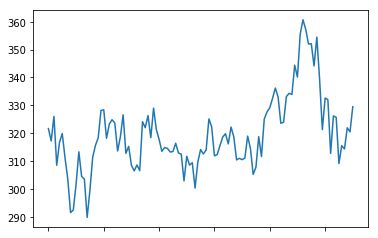

In [4]:
idx = [55, 107, 309, 742, 916, 958]
sums = (df.T[got]).sum(axis=1)
print(sums.shape)
sums.plot()
s = sums.as_matrix()

m = s.mean()
print(m)
last = s[0] < m
reg = 0
for i in range(1, len(s)):
    if (s[i] < m) != last:
        print(i, s[i], s[i-1])
        reg+=1
        last = s[i] < m

reg